# Variance of the horizontal gradients

We difine the isotropic stream function in Fourier space as:

$$\hat{\psi}(k, l) = F(K_h) e^{i\chi}, $$

where the amplitude $F(K_h)$ is only a function of the isotropic wavenumber $K_h = (k^2 + l^2)^{1/2}$, and $\chi$ represents a random phase.

In physical space, the velocity components can be obatained from the stream function by

$$u = - \psi_y,\ \ v = \psi_x.$$

Such that in Fourier space

$$\hat{u} = - i l \hat{\psi},\ \  \hat{v} =  i k \hat{\psi}.$$

Let's consider only the u component of the velocity field for now. The horizontal gradients of u in Fourier space are given by:

$$\hat{u_x} = - kl \hat{\psi},\ \  \hat{u_y} =  l^2 \hat{\psi}$$

From Parseval's theorem, the variance of the gradients can be obtained from the amplitude of the Fourier coefficients:

$$<u^2_x> = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} k^2l^2 |\hat{\psi}|^2 dkdl $$

Similarly for the gradient in y:

$$<u^2_y> = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} l^4 |\hat{\psi}|^2 dkdl $$

Since $|\hat{\psi}|^2$ is only a function of the isotropic wavenumber, we change coordinates from $(k, l)$ to $(K_h, \theta)$:

$$<u^2_x> = \int_{0}^{-\infty}\int_{0}^{2\pi} K_h^4\cos^2{\theta}\sin^2{\theta}F(K_h)K_hdK_hd\theta $$

and 

$$<u^2_y> = \int_{0}^{-\infty}\int_{0}^{2\pi} K_h^4\sin^4{\theta}F(K_h)K_hdK_hd\theta .$$


Just rearranging the integrals, we get: 

$$<u^2_x> = \int_{0}^{-\infty}K^5_h F(K_h)dK_h \int_{0}^{2\pi} \cos^2{\theta}\sin^2{\theta}d\theta $$

and 

$$<u^2_y> = \int_{0}^{-\infty}K^5_hF(K_h)dK_h\int_{0}^{2\pi}\sin^4{\theta}d\theta .$$

Solving the integral in theta, gives us:

$$<u^2_x> = \frac{\pi}{4} \int_{0}^{-\infty}K^5_h F(K_h)dK_h $$

and 

$$<u^2_y> = \frac{3\pi}{4} \int_{0}^{-\infty}K^5_h F(K_h)dK_h $$

which implies that:

$$ \frac{<u^2_y>}{<u^2_x>} = 3$$

and this ratio should be independent of $F(K_h)$.

### Now let's test

In [49]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sys

import numpy as np
from numpy import pi
import scipy.stats
import matplotlib.pyplot as plt

Defining constants and main parameters

In [9]:
N = 400 # number of points in x and y
x = range(N) 
dx = 2.5 # grid resolution
L = N*dx # lengh of the domain
dk = 1./L # wavenumber reslution
Nyq = 1./(2.*dx) # Nyquist
k_thr = 1.e-8 
k = np.arange(-Nyq,Nyq,dk) # k wavenumber
k = k/k.max() # normalizing the wavenumber just to make things simpler
l = k.copy()
kk, ll = np.meshgrid(k, l)
K = (kk**2 + ll**2)**.5 # isotropic wavenumber

Creating stream function in Fourier space

In [16]:
seed=1 # random seed
rand_seed = np.random.RandomState(seed) 
slope = 4. # spectral slope
S0 =(1/K**slope)/K
S0 = np.ma.masked_array(S0,K<=k_thr)
Nk, Nl = len(k), len(l)
pha = rand_seed.rand(Nl, Nk)
pha = pha - pha.mean()

psi_hat = np.fft.fft2(pha) * S0**.5
psi = np.fft.ifft2(np.fft.fftshift(psi_hat)).real

psiy_hat = - np.fft.fftshift(psi_hat * 1.0j*ll)
psix_hat = - np.fft.fftshift(psi_hat* 1.0j*kk)

uy_hat = np.fft.fftshift(psi_hat * ll*ll)
ux_hat = - np.fft.fftshift(psi_hat* kk*ll)

us = np.fft.ifft2(-psiy_hat).real
vs = np.fft.ifft2(psix_hat).real
Us = (us**2 + vs**2)**.5

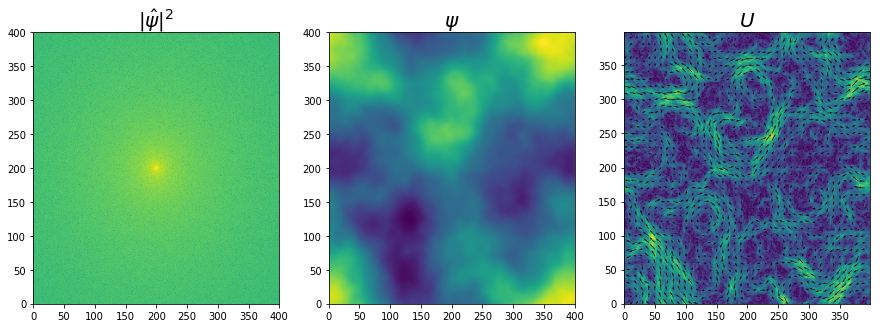

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.pcolor(np.log10(abs(psi_hat)))
plt.title('$|\hat{\\psi}|^2$', fontsize=20)
plt.subplot(132)
plt.pcolor(psi)
plt.title('$\\psi$', fontsize=20)
plt.subplot(133)
plt.pcolor(x, x, Us)
plt.quiver(x[::10], x[::10], us[::10,::10], vs[::10,::10])
plt.title('$U$', fontsize=20)

Ratio between the variance of $u_y$ and $u_x$

In [20]:
print np.sum(abs(uy_hat)**2) /  np.sum(abs(ux_hat)**2)

2.73303820721


Which is not equal to 3. Now let's try Bill's idea. The the isotropic wavenumber looks like:

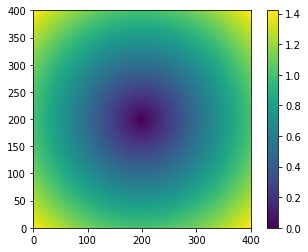

In [25]:
ax = plt.subplot(111)
cs = ax.pcolor(K)
plt.colorbar(cs)
ax. set_aspect('equal', 'box')

We want to set the Fourier coefficients of $\hat{\psi}$ in places where $K > 1$ to zero

In [26]:
psi_hat[K>1] = 0. + 0.j

psi = np.fft.ifft2(np.fft.fftshift(psi_hat)).real

psiy_hat = - np.fft.fftshift(psi_hat * 1.0j*ll)
psix_hat = - np.fft.fftshift(psi_hat* 1.0j*kk)

uy_hat = np.fft.fftshift(psi_hat * ll*ll)
ux_hat = - np.fft.fftshift(psi_hat* kk*ll)

us = np.fft.ifft2(-psiy_hat).real
vs = np.fft.ifft2(psix_hat).real
Us = (us**2 + vs**2)**.5

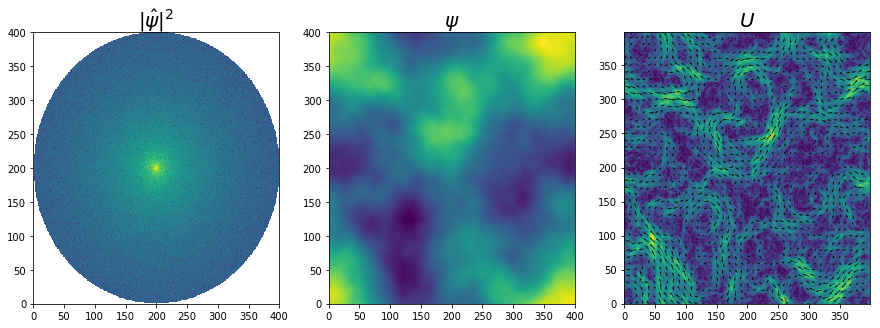

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.pcolor(np.log10(abs(psi_hat)))
plt.title('$|\hat{\\psi}|^2$', fontsize=20)
plt.subplot(132)
plt.pcolor(psi)
plt.title('$\\psi$', fontsize=20)
plt.subplot(133)
plt.pcolor(x, x, Us)
plt.quiver(x[::10], x[::10], us[::10,::10], vs[::10,::10])
plt.title('$U$', fontsize=20)

Now we check the variance again:

In [32]:
print np.sum(abs(uy_hat)**2)/np.sum(abs(ux_hat)**2)

2.99484638531


much better

Now let's check this for multiple spectral slopes (all should give the same result). For this particular case, the spectral slopes of $\hat{\psi}$ range from 0 to -5.

In [75]:
rand_seed = np.random.RandomState(1) 
pha = rand_seed.rand(Nl, Nk)
pha = pha - pha.mean()

ux_var = []
uy_var = []
slopes = []
for slope in np.linspace(0,5, 300):

    S0 =(1/K**slope)/K
    S0 = np.ma.masked_array(S0,K<=k_thr)

    psi_hat = np.fft.fft2(pha) * S0**.5
    psi_hat[K>1] = 0. + 0.j

    uy_hat = np.fft.fftshift(psi_hat * ll*ll)
    ux_hat = - np.fft.fftshift(psi_hat* kk*ll)
    
    uy_var.append(np.sum(abs(uy_hat)**2))
    ux_var.append(np.sum(abs(ux_hat)**2))
    slopes.append(slope)
ux_var = np.array(ux_var)
uy_var = np.array(uy_var)

In [76]:
a, b, r, p, std = scipy.stats.linregress(ux_var, uy_var)

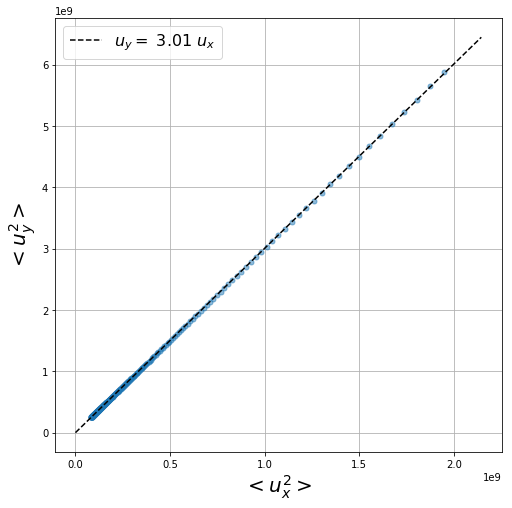

In [80]:
plt.figure(figsize=(8,8))
plt.plot(ux_var, uy_var, 'o', ms=5, alpha=.5)
plt.plot([0, ux_var.max()*1.1], [0, a*ux_var.max()*1.1], '--', color='k', 
         label='$u_y =$ %.2f $u_x$'%a)
plt.grid()
plt.legend(fontsize=16)
plt.xlabel('$<u^2_x>$', fontsize=20)
plt.ylabel('$<u^2_y>$', fontsize=20)